# Quantum Amplitude Estimation (QAE)

Quantum amplitude estimation (QAE) is a process that estimates the parameter $a$ in a wavefunction of the form

$$
\lvert \psi \rangle =\mathrm{\hat{A}} \lvert 0 \rangle ^{\otimes n} = \sqrt a\lvert \psi_1 \rangle  + \sqrt{1-a} \lvert \psi_0 \rangle ,
$$

with $a \in [0,1]$ and $\lvert \psi_1 \rangle$, $\lvert \psi_0 \rangle$ projections of $\lvert \psi \rangle$ into two different subspaces. $\mathrm{\hat{A}}$ is a problem-dependent initialization operator.

The quantum algorithm for amplitude estimation relies on quantum amplitude amplification, as in Grover searching. The original ("canonical") proposal relied on phase estimation applied to the amplitude amplification operator. Newer algoritms rely on non-controlled amplitude amplification, estimating the amplitude based on measurements of the amplified state at different degrees of amplifications. These are usually iterative quantum-classical algorithms, with classical feedback deciding the degree of amplification for the following iteration (often adaptively, i.e. based on previous measurement outcomes).

<img src="images/hybrid.png" alt="hybrid" width="700" style="display: block; margin: 0 auto;">

## **Table of contents**<a id='toc0_'></a>    
  - [Testing QAE algorithms](#toc1_1_)    
    - [Canonical QAE](#toc1_1_1_)    
    - [Classical AE](#toc1_1_2_)    
    - [Bayesian QAE (BAE)](#toc1_1_3_)    
    - [Iterative QAE (IAE)](#toc1_1_4_)    
    - [Modified iterative QAE (mIQAE)](#toc1_1_5_)    
    - [Maximum Likelihood IQAE (MLAE)](#toc1_1_6_)    
    - [Faster QAE (FAE)](#toc1_1_7_)    
    - [QAE, simplified (QAES)](#toc1_1_8_)    
    - [Simpler QAE (SQAE)](#toc1_1_9_)    
  - [Comparative results](#toc1_2_)    
  - [References](#toc1_3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Testing QAE algorithms](#toc0_)

We test the following amplitude estimation algorithms:

- Canonical quantum amplitude estimation [1]
- Classical amplitude estimation (Monte Carlo averaging)
- Bayesian quantum amplitude estimation 
- Iterative quantum amplitude estimation [2]
- Modified iterative quantum amplitude estimation [3]
- Maximum likelihood quantum amplitude estimation [4]
- Faster quantum amplitude estimation [5]
- Simplified quantum amplitude estimation [6]
- Simpler quantum amplitude estimation [7]

Each QAE algorithm is tested by running it several times and plotting the root
mean squared error and the median error as functions of the numbers of queries,
and printing the approximate parameters for a linear fit (in the logspace).

The amplitude and the coherence time can be either numbers or tuples. In the 
latter case, their values are picked at random for each run from the range 
indicated by the tuple. A coherence time of None means the absence of 
decoherence.

These 2 parameters are common to algorithms. Each algorithm requires specific 
additional parameters, which are specified in the 
corresponding cells.

Additional parameters common to all algorithms are 'silent' and 'save'. If 
silent is True, minimal prints are used; otherwise, information pertaining to
the algorithm execution is printed. If save is True, the graphs and data from
the execution are saved; otherwise, the graphs are only displayed and the data
discarded.

In [1]:
from src.algorithms.QAE_emulator import TestQAE
from src.algorithms.classicalAE import testCAE
from src.algorithms.BAE_testing import TestBAE
from src.algorithms.IQAE import TestIQAE
from src.algorithms.MLQAE import TestMLQAE
from src.algorithms.FQAE import TestFQAE
from src.algorithms.QAES import TestQAES
from src.algorithms.SQAE import TestSQAE

In [2]:
a = 0.1 # (0,1)  
Tc = None # (2000, 5000)
nruns = 100

### <a id='toc1_1_1_'></a>[Canonical QAE](#toc0_)

> Will test 100 runs of 'canonical QAE'.
> Testing 100 runs of QAE with 2 aux qubits...
|0%|5%|10%|15%|20%|25%|30%|35%|40%|45%|50%|55%|60%|65%|70%|75%|80%|85%|90%|95%|100%|
> Testing 100 runs of QAE with 4 aux qubits...
|0%|5%|10%|15%|20%|25%|30%|35%|40%|45%|50%|55%|60%|65%|70%|75%|80%|85%|90%|95%|100%|
> Testing 100 runs of QAE with 6 aux qubits...
|0%|5%|10%|15%|20%|25%|30%|35%|40%|45%|50%|55%|60%|65%|70%|75%|80%|85%|90%|95%|100%|
> Testing 100 runs of QAE with 8 aux qubits...
|0%|5%|10%|15%|20%|25%|30%|35%|40%|45%|50%|55%|60%|65%|70%|75%|80%|85%|90%|95%|100%|
> Testing 100 runs of QAE with 10 aux qubits...
|0%|5%|10%|15%|20%|25%|30%|35%|40%|45%|50%|55%|60%|65%|70%|75%|80%|85%|90%|95%|100%|
> Testing 100 runs of QAE with 12 aux qubits...
|0%|5%|10%|15%|20%|25%|30%|35%|40%|45%|50%|55%|60%|65%|70%|75%|80%|85%|90%|95%|100%|
> Canonical root mean squared error (normalized) = O(Nq^-0.9); offset = 4.16.


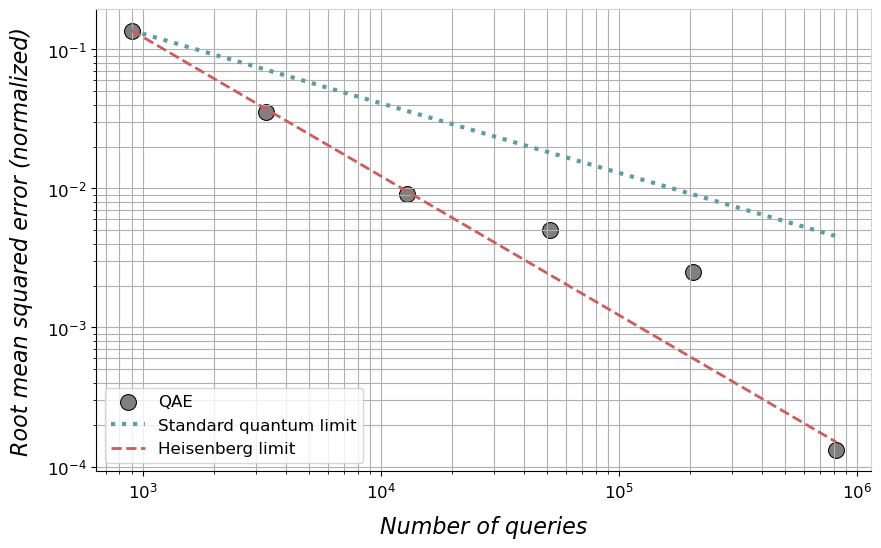

> Canonical median error (normalized) = O(Nq^-0.98); offset = 4.21.


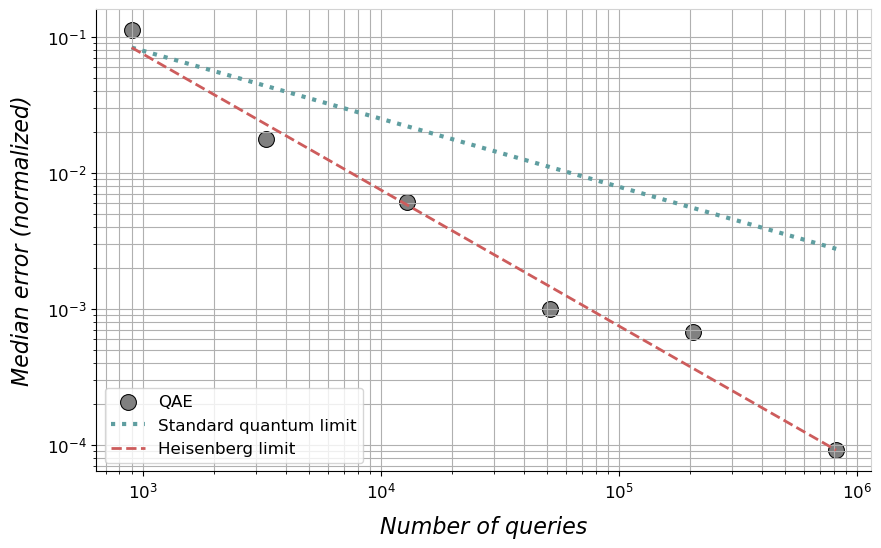

In [3]:
mmin = 2
Nq_target = 10**6
nshots = 100
tester = TestQAE(a, mmin, nshots, silent = True)
tester.sqe_evolution_multiple(mmin, Nq_target, nruns, MLE = True, save = False)

### <a id='toc1_1_2_'></a>[Classical AE](#toc0_)

> Will test 100 runs of 'classical AE'.
> Classical root mean squared error (normalized) = O(Nq^-0.49); offset = 1.02.


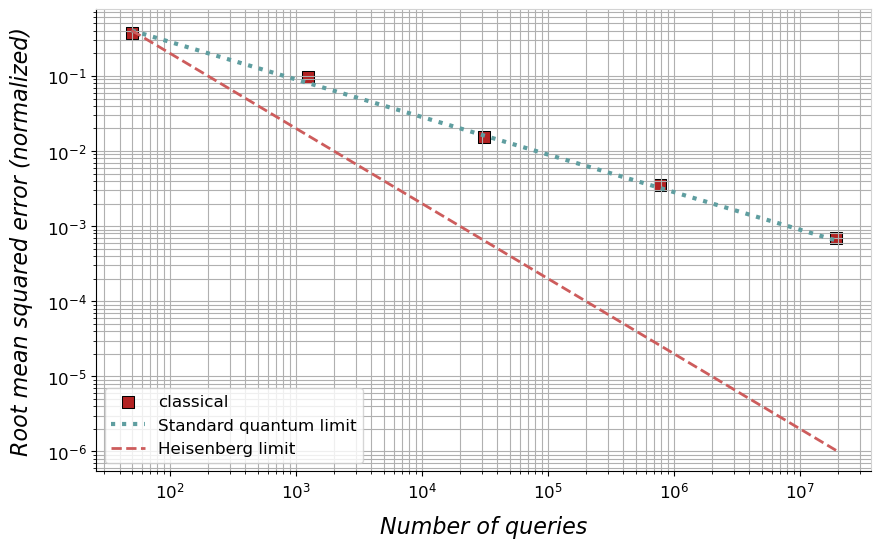

> Classical median error (normalized) = O(Nq^-0.47); offset = 0.36.


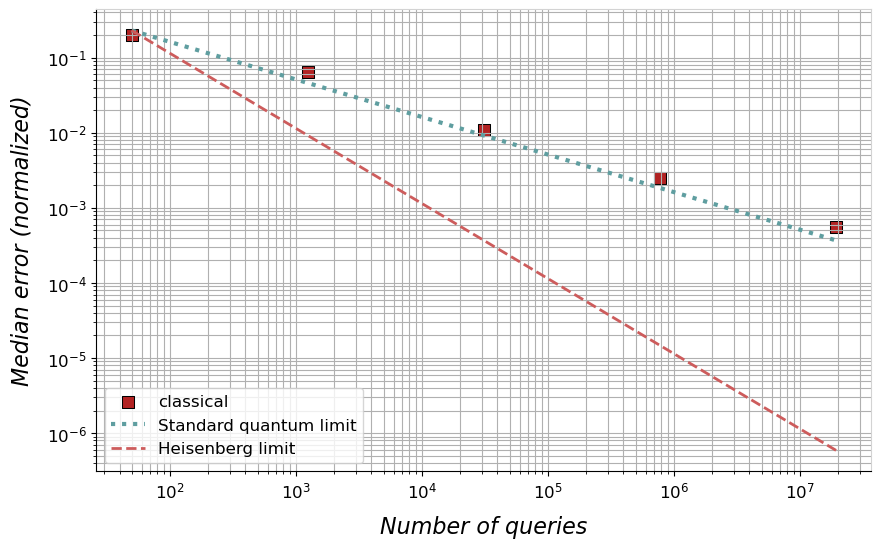

In [4]:
Nq_start = 5*10**1
Nq_target = 10**8
test = testCAE(a, silent = True)
test.sqe_evolution_multiple(Nq_start, Nq_target, nruns, save = False)

### <a id='toc1_1_3_'></a>[Bayesian QAE (BAE)](#toc0_)

Bayesian QAE aditionally plots the evolution of the error estimate (standard 
deviation).

> Will test 100 runs of 'Bayesian QAE'.
|0%|5%|10%|15%|20%|25%|30%|35%|40%|45%|50%|55%|60%|65%|70%|75%|80%|85%|90%|95%|100%|
> Bae root mean squared error (normalized) = O(Nq^-0.99); offset = 2.88.


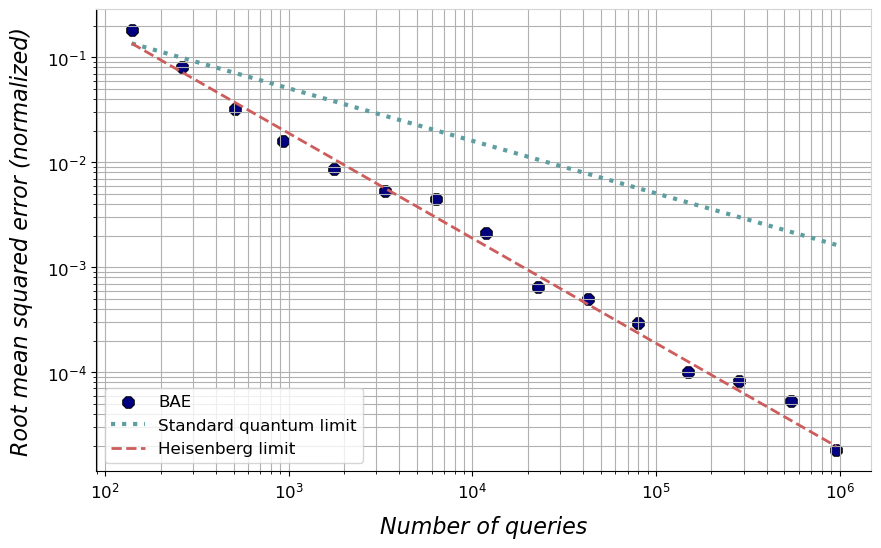

> Bae mean standard deviation (normalized) = O(Nq^-0.99); offset = 3.04.


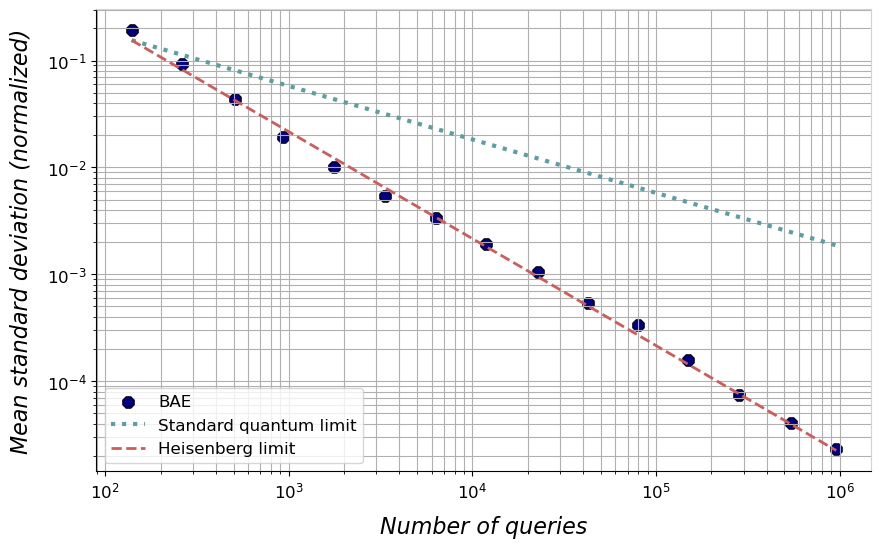

> Bae median error (normalized) = O(Nq^-1.07); offset = 2.71.


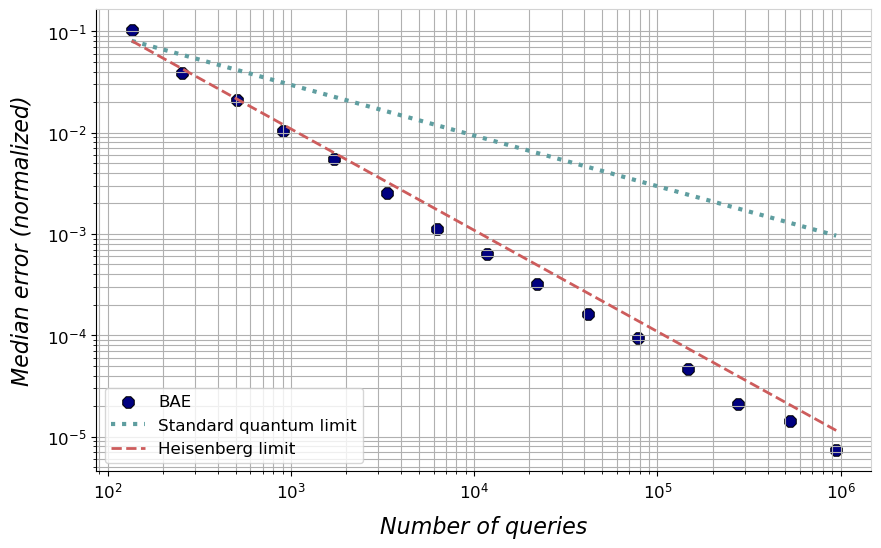

> Bae median standard deviation (normalized) = O(Nq^-1.03); offset = 3.09.


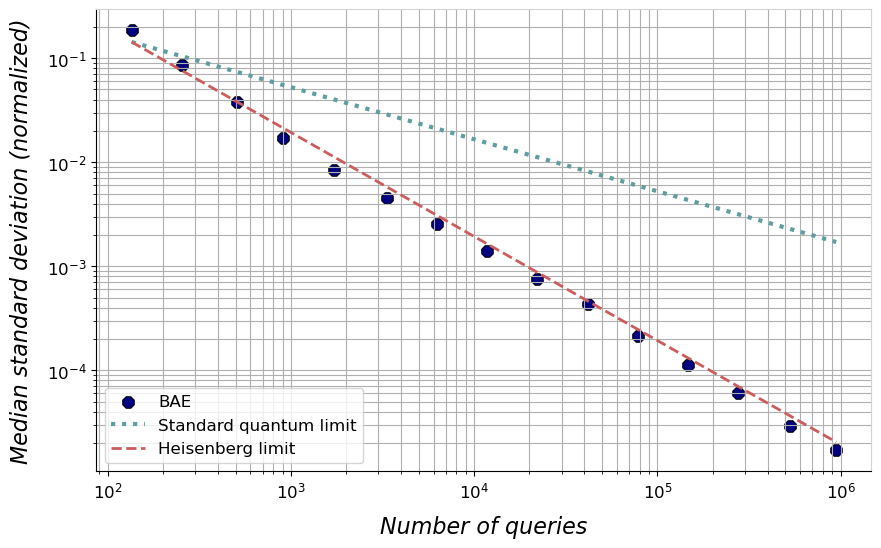

In [5]:
Nq_target = 10**6

# Strategy for dealing with decoherence.
Tc_opts = {"Tc": Tc,
            "Tc_precalc": True if Tc else False,
            "known_Tc": False,
            "range": Tc}

# Strategy for the adaptive optimization.
strat = {"wNs": 100,
            "Ns": 1,
            "TNs": 500,
            "k": 1,
            "Nevals": 50,
            "erefs": 3,
            "ethr": 3,
            "cap": False,
            "capk": 2}

# Sampler arguments.
sampler_str = 'RWM'
sampler_kwargs = {"Npart": 2000,
                    "thr": 0.5,
                    "var": "theta",
                    "ut": "var",
                    "c": 2.38,
                    "log": True,
                    "res_ut": False,
                    "plot": False}

tester = TestBAE(a, Tc_opts, strat, Nq_target, sampler_str, sampler_kwargs, 
                 silent = True, save = False)
tester.sqe_evolution_multiple(nruns, redirect = 2)

### <a id='toc1_1_4_'></a>[Iterative QAE (IAE)](#toc0_)

> Will test 100 runs of 'Iterative QAE'.
|0%|5%|10%|15%|20%|25%|30%|35%|40%|45%|50%|55%|60%|65%|70%|75%|80%|85%|90%|95%|100%|
> Iqae - chernoff root mean squared error (normalized) = O(Nq^-1.03); offset = 4.19.


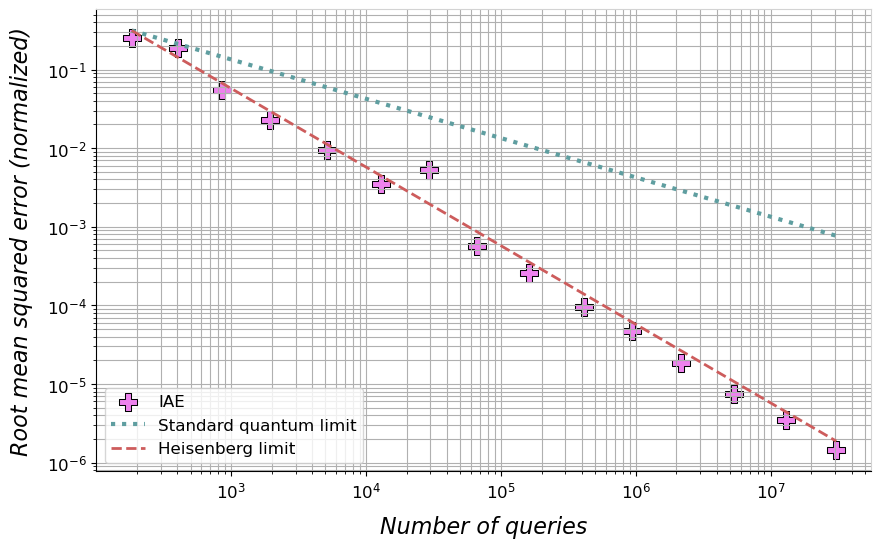

> Iqae - chernoff median error (normalized) = O(Nq^-1.03); offset = 3.62.


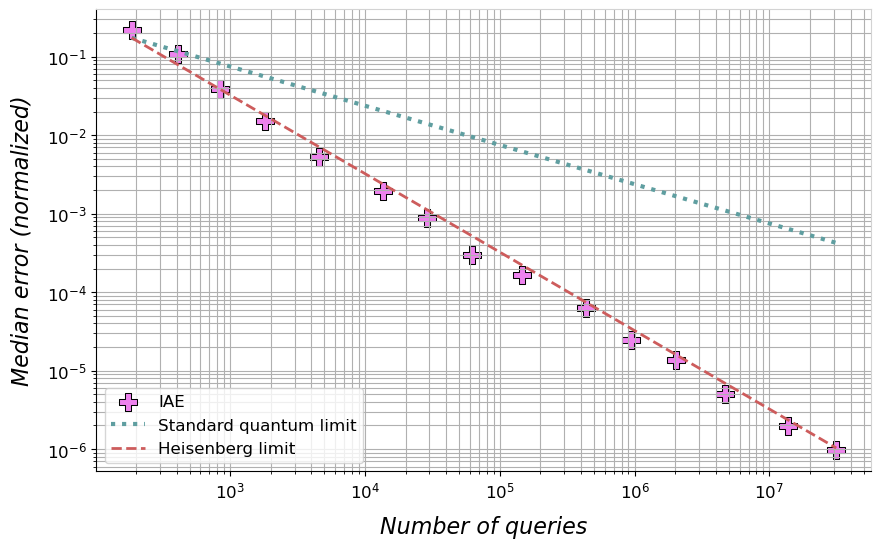

In [8]:
alpha = 0.05
nshots = 100
modified = False
ci = "chernoff"
eps_start, eps_end = 1e-1, 4e-7
tester = TestIQAE(a, Tc, nshots, alpha, modified, ci, silent = True)
tester.sqe_evolution_multiple(nruns, eps_start, eps_end, save = False)

### <a id='toc1_1_5_'></a>[Modified iterative QAE (mIQAE)](#toc0_)

> Will test 100 runs of 'Iterative QAE'.
|0%|5%|10%|15%|20%|25%|30%|35%|40%|45%|50%|55%|60%|65%|70%|75%|80%|85%|90%|95%|100%|
> Miqae - chernoff root mean squared error (normalized) = O(Nq^-1.03); offset = 4.85.


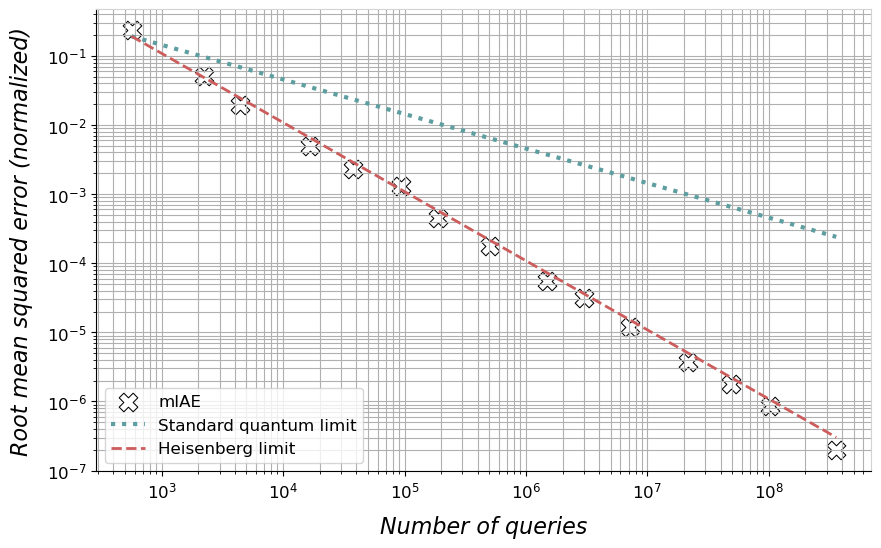

> Miqae - chernoff median error (normalized) = O(Nq^-1.03); offset = 4.49.


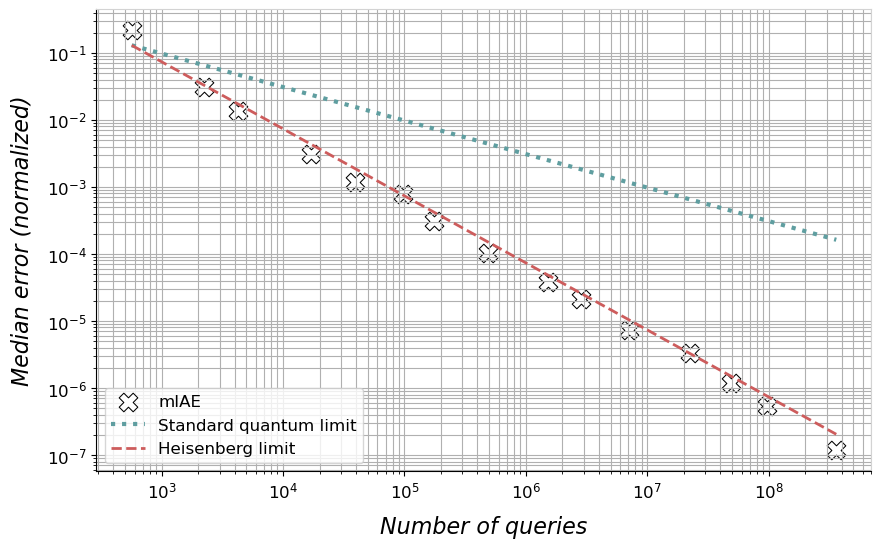

In [10]:
alpha = 0.05
nshots = 100
modified = True
ci = "chernoff"
eps_start, eps_end = 1e-1, 4e-7
tester = TestIQAE(a, Tc, nshots, alpha, modified, ci, silent = True)
tester.sqe_evolution_multiple(nruns, eps_start, eps_end, save = False)

### <a id='toc1_1_6_'></a>[Maximum Likelihood IQAE (MLAE)](#toc0_)

> Will test 100 runs of 'Maximum Likelihood QAE'  (EIS, LIS).
|0%|5%|10%|15%|20%|25%|30%|35%|40%|45%|50%|55%|60%|65%|70%|75%|80%|85%|90%|95%|100%|
|0%|5%|10%|15%|20%|25%|30%|35%|40%|45%|50%|55%|60%|65%|70%|75%|80%|85%|90%|95%|100%|
> Lis root mean squared error (normalized) = O(Nq^-0.79); offset = 2.52.
> Eis root mean squared error (normalized) = O(Nq^-0.75); offset = 2.2.


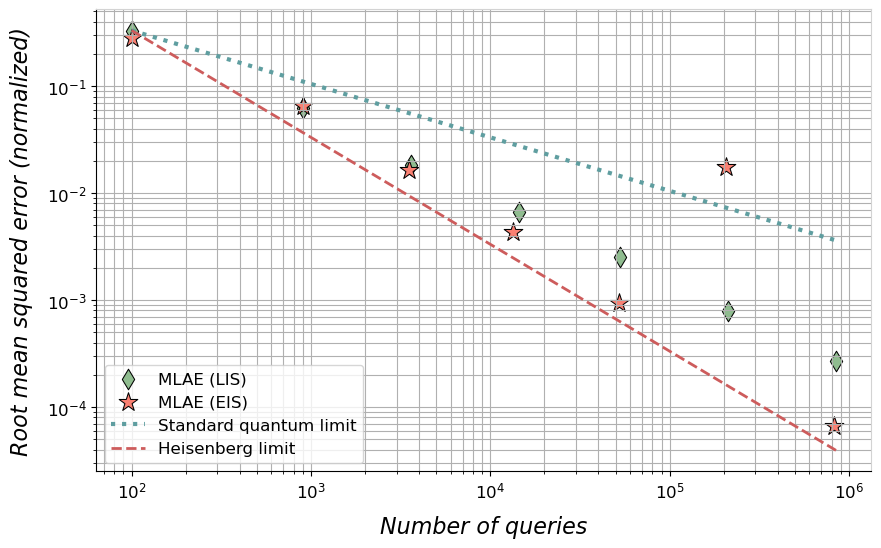

> Lis median error (normalized) = O(Nq^-0.78); offset = 2.01.
> Eis median error (normalized) = O(Nq^-0.93); offset = 2.93.


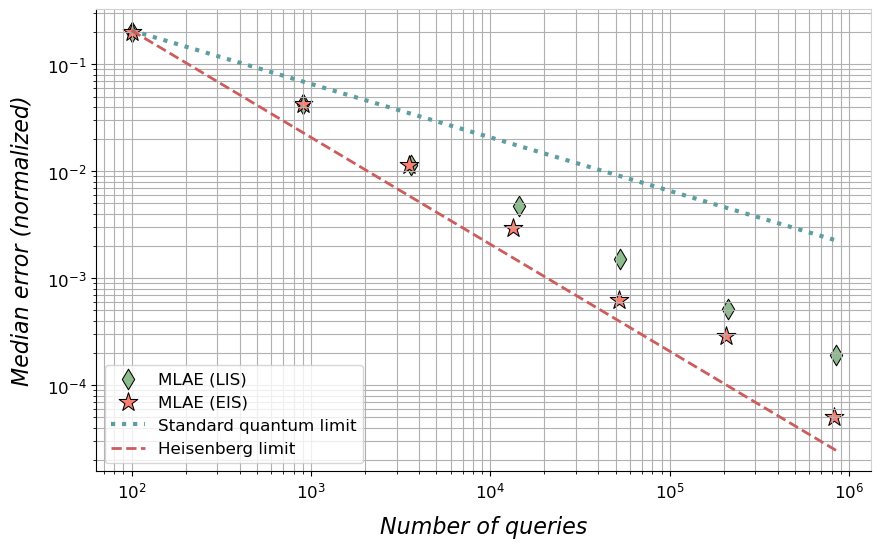

In [4]:
nshots = 100
Nq_target = 10**6
seqs = ["EIS", "LIS"]
Nq_calc = "cumul"
tester = TestMLQAE(a, Tc, nshots, Nq_calc = Nq_calc, silent = True)
tester.sqe_evolution_multiple(nruns, Nq_target, seqs, save = False)

### <a id='toc1_1_7_'></a>[Faster QAE (FAE)](#toc0_)

> Will test 100 runs of 'Faster QAE'.
|0%|5%|10%|15%|20%|25%|30%|35%|40%|45%|50%|55%|60%|65%|70%|75%|80%|85%|90%|95%|100%|
> Fqae root mean squared error (normalized) = O(Nq^-0.97); offset = 10.7.


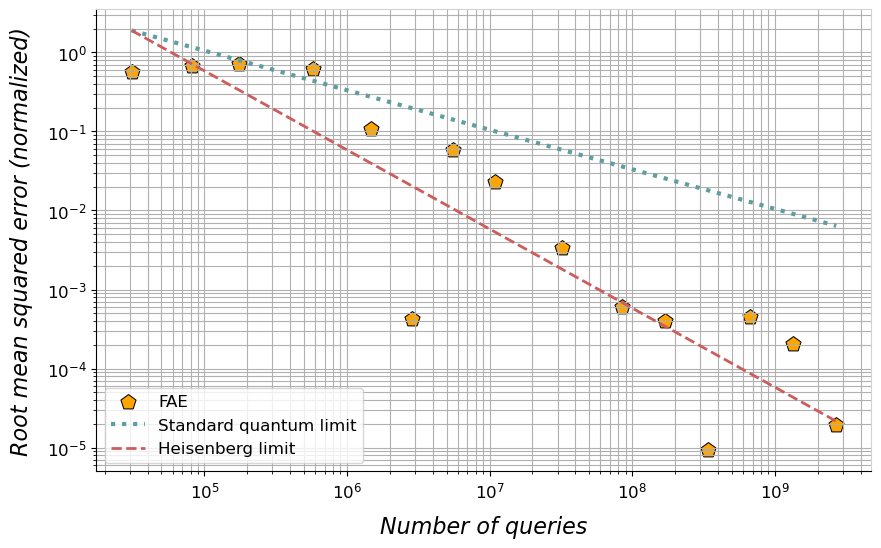

> Fqae median error (normalized) = O(Nq^-0.97); offset = 10.63.


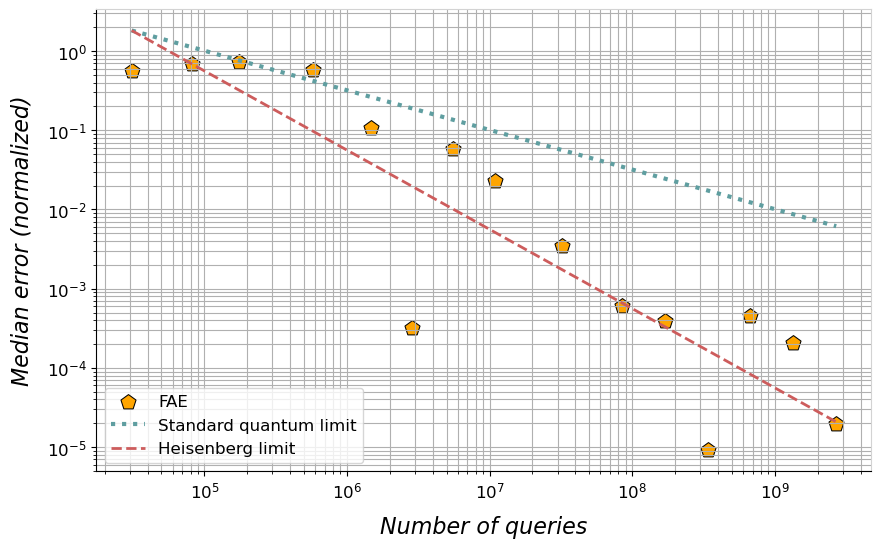

In [12]:
delta_c = 0.01
kmax_start, kmax_end = 1, 18
tester = TestFQAE(a, Tc, delta_c, silent = True)
tester.sqe_evolution_multiple(nruns, kmax_start, kmax_end, save = False)

### <a id='toc1_1_8_'></a>[QAE, simplified (QAES)](#toc0_)

> Will test 100 runs of 'QAE, simplified'.
|0%|5%|10%|15%|20%|25%|30%|35%|40%|45%|50%|55%|60%|65%|70%|75%|80%|85%|90%|95%|100%|
> Qaes root mean squared error (normalized) = O(Nq^-1.0); offset = 18.12.


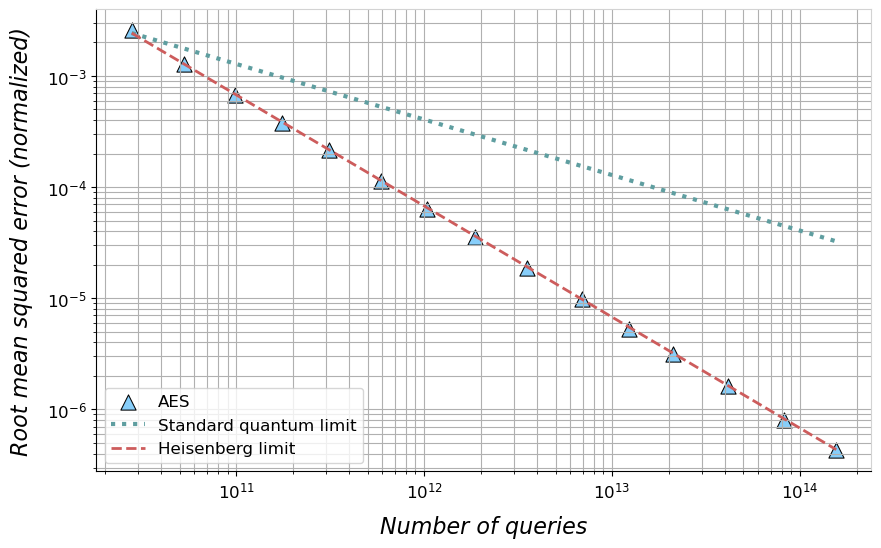

> Qaes median error (normalized) = O(Nq^-1.01); offset = 18.16.


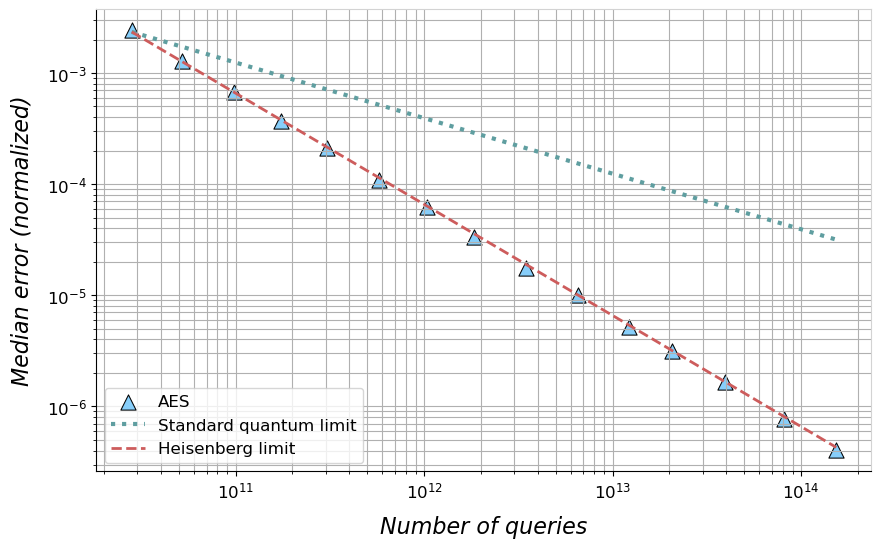

In [13]:
epsmax = 1e-2
epsmin = 1e-6
alpha = 0.05
tester = TestQAES(a, Tc,  alpha, silent = True)
tester.sqe_evolution_multiple(nruns, epsmin, epsmax, save = False)

### <a id='toc1_1_9_'></a>[Simpler QAE (SQAE)](#toc0_)

> Will test 100 runs of 'Simpler QAE'.
|0%|5%|10%|15%|20%|25%|30%|35%|40%|45%|50%|55%|60%|65%|70%|75%|80%|85%|90%|95%|100%|
> Sqae #2 root mean squared error (normalized) = O(Nq^-0.51); offset = 1.37.


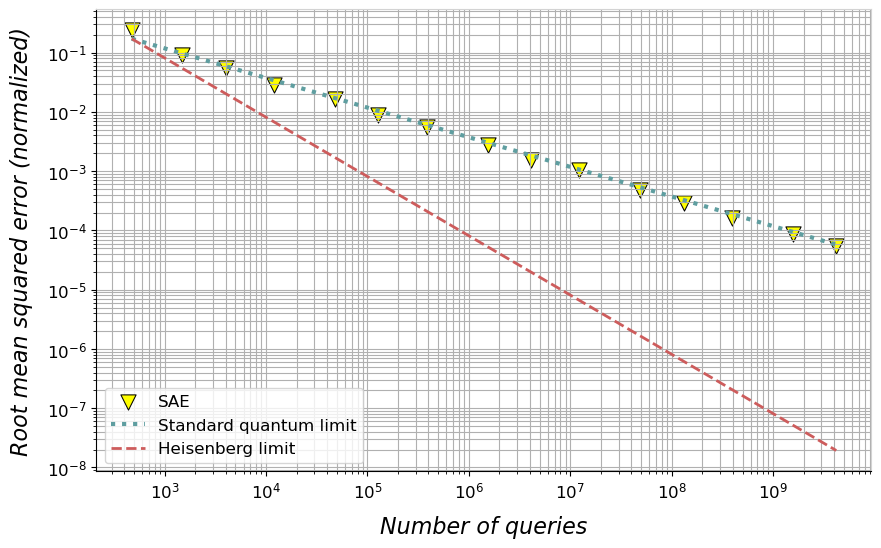

> Sqae #2 median error (normalized) = O(Nq^-0.51); offset = 0.97.


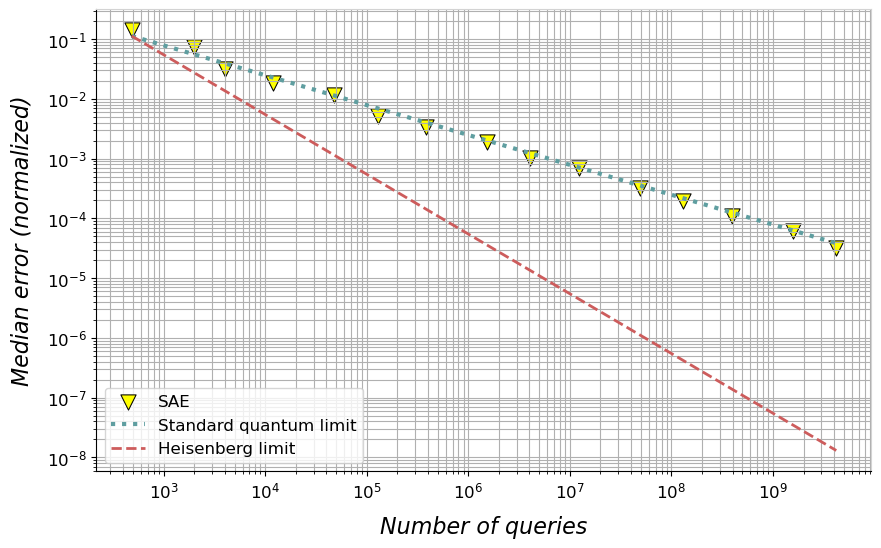

In [14]:
nshots = 100
formula = 2
threshold = 0.5
Nq_start = 500
Nq_target = 10**10
tester = TestSQAE(a, Tc, nshots, formula, threshold, silent = True)
tester.sqe_evolution_multiple(nruns, Nq_start, Nq_target, save = False)  

## <a id='toc1_2_'></a>[Comparative results](#toc0_)

We can compare the performance of various QAE algorithms by plotting them together to better observe the differences in learning rate and offset. The ```datasets``` folder contains 2 groups of datasets for all algorithms: one for noiseless simulations (only shot noise), the other one considering a finite coherence time. In both cases the amplitudes and coherence times are random, with $a \in [0,1[$ and $T_c \in [2000, 5000[$, where a unit of time corresponds to the duration of one execution of the amplitude amplification operator. Note that the randomization of $a$ renders the performance of most algorithms erratic in the average case. Medians show a clearer trend. 

> Will plot QAE estimation results from folder 'noiseless'.


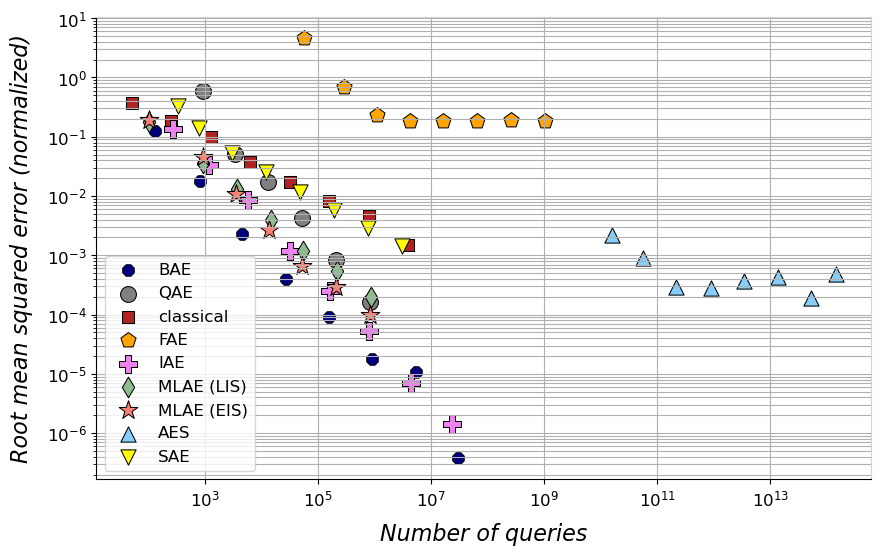

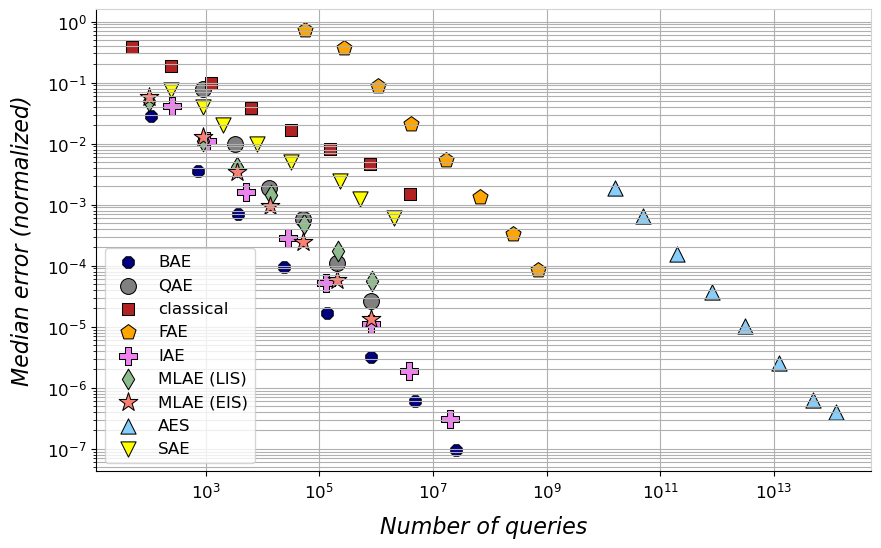

> Will plot QAE estimation results from folder 'noisy'.


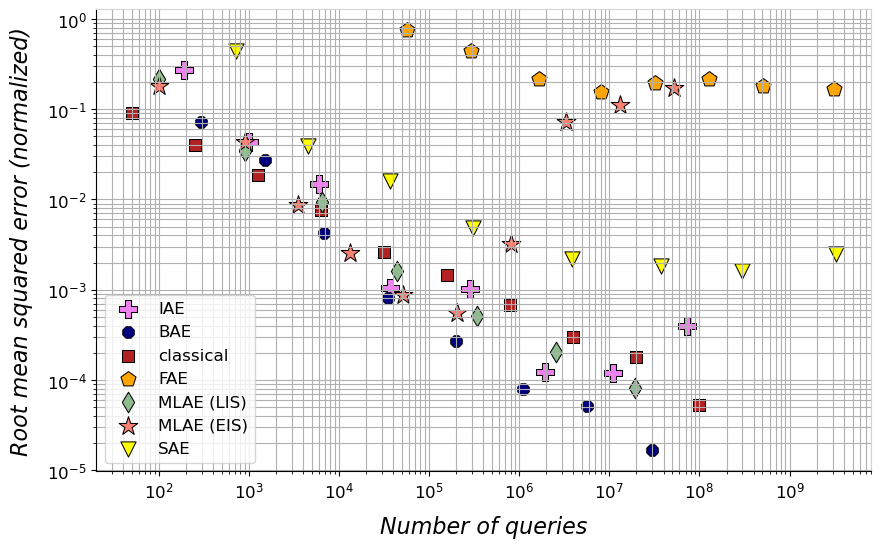

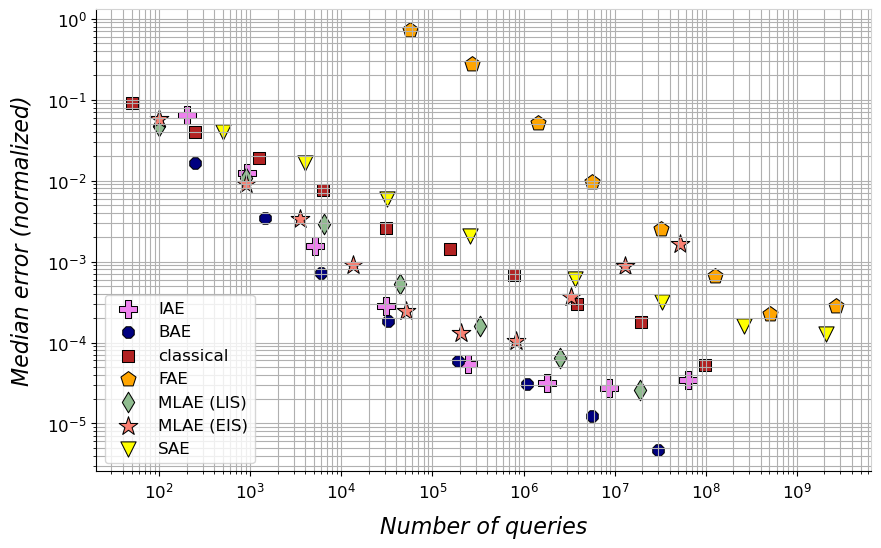

In [6]:
from scripts.joint_plot import plot_from_folder

folders = ["noiseless", "noisy"]
for folder in folders:
    plot_from_folder(folder, silent = True, save = False)

## <a id='toc1_3_'></a>[References](#toc0_)

[1] Brassard et al (2000). Quantum Amplitude Estimation and Amplification.

[2] Grinko et al (2021). Iterative quantum amplitude estimation.

[3] Fukuzawa et al (2022). Modified Iterative quantum amplitude estimation is asymptotically optimal.

[4] Suzuki et al (2019). Amplitude Estimation without phase estimation.

[5] Nakaji et al (2020). Faster Amplitude Estimation.

[6] Aaranson et al (2019). Quantum Approximate Counting, Simplified.

[7] Wie et al (2019). Simpler Quantum Counting.





